In [25]:
import matplotlib.pyplot as plt
import numpy as np
import time
%matplotlib notebook

<IPython.core.display.Javascript object>


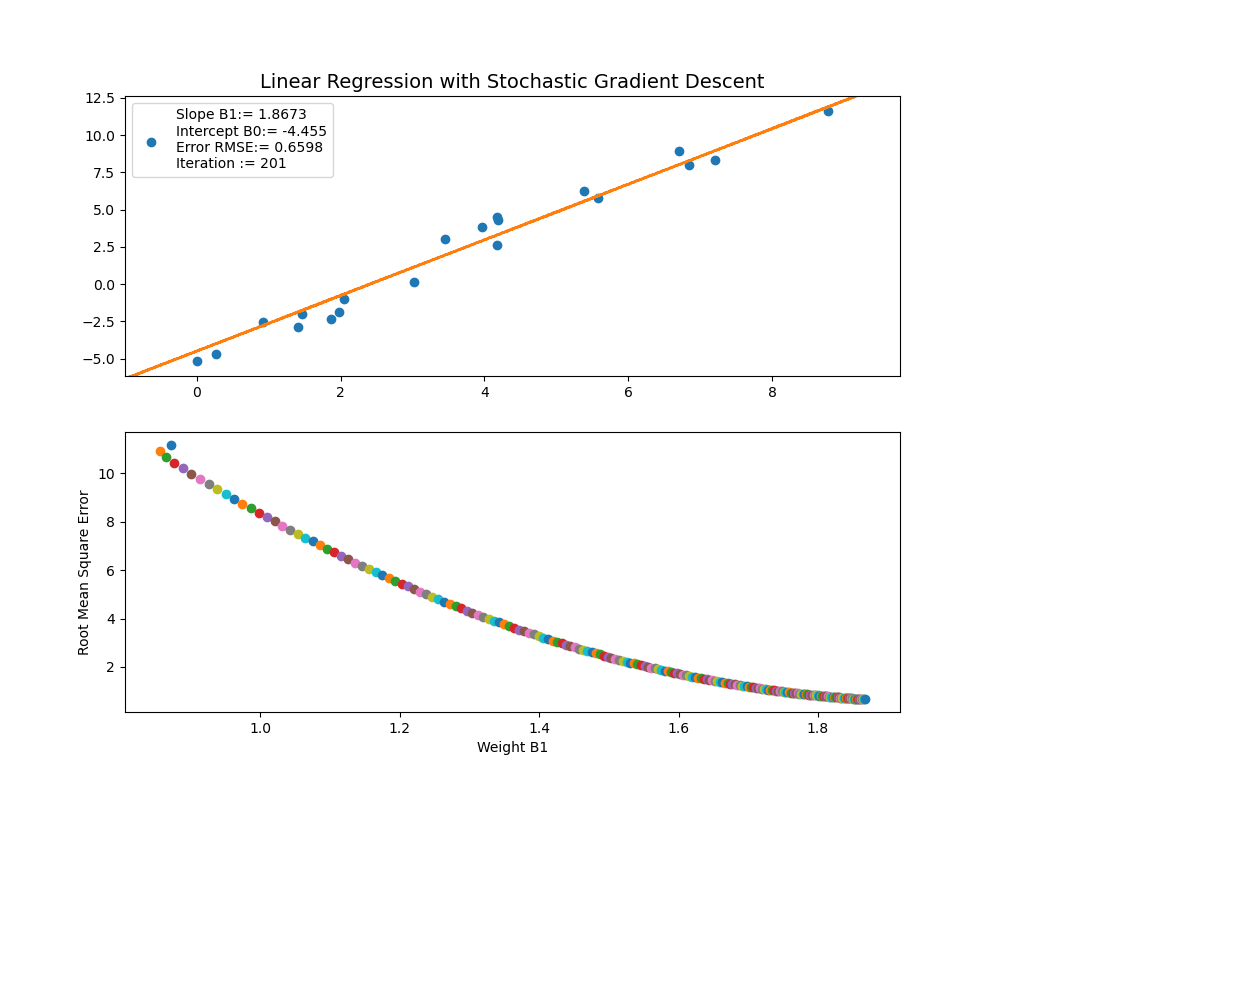

In [53]:
#Data generation
rng = np.random.RandomState(1)
X = 10 * rng.rand(20)
y = 2 * X - 5 + rng.randn(20)


plt.ion()
fig , (ax, ax2) = plt.subplots(2)
ax.set_xlim(X.min()-1,X.max()+1)
ax.set_ylim(y.min()-1,y.max()+1)

#cost function using root mean square
def cost_fun_rmse(X, y, B1, B0):
    y_pred = X*B1 + B0
    return np.sum(np.square(y-y_pred))/X.shape[0]

#Gradient descent
def gradient_descent(X,y,alpha,B1,B0):
    y_pred = X*B1 + B0 #making predictions
    y_diff = (y - y_pred) #difference between prediction & ground truth
    t_B1 = -2*(np.sum(y_diff*X)/X.shape[0]) #derivative of error wrt. slope 
    t_B0 = -2*(np.sum(y_diff)/X.shape[0]) #derivative of error wrt. intercept
    B1 = B1 - alpha*t_B1 #weight updation
    B0 = B0 - alpha*t_B0 #weight updation
    return (B1, B0)

def stochastic_gradient_descent(X,y,alpha,B1,B0):
    rand_num = np.random.randint(X.shape[0])
    X = X[rand_num]
    y = y[rand_num]
    y_pred = X*B1 + B0
    y_diff = (y - y_pred)
    t_B1 = -2*(np.sum(y_diff*X))
    t_B0 = -2*(np.sum(y_diff))
    B1 = B1 - alpha*t_B1
    B0 = B0 - alpha*t_B0
    return (B1, B0)

B1 = 1     #slope
B0 = 1     #interscept
alpha = 0.02 #learning rate
iter_num = 200   # number of iterations
x_vals = np.arange(ax.get_xlim()[0],ax.get_xlim()[1],0.01)
ax.scatter(X,y)
ax.set_title('Linear Regression with Stochastic Gradient Descent', fontsize = 14)

ax2.set_xlabel('Weight B1')
ax2.set_ylabel('Root Mean Square Error')

for i in range(iter_num+1):
    B1, B0 = gradient_descent(X,y,alpha,B1,B0)
    rmse  = cost_fun_rmse(X,y,B1, B0)
    ax.legend(['Slope B1:= '+ str(round(B1,4)) + '\n'
               +'Intercept B0:= ' + str(round(B0,4)) + '\n' 
               + 'Error RMSE:= ' + str(round(rmse, 4))+ '\n'
               + 'Iteration := ' + str(i+1)
              ])
    
    y_vals = x_vals*B1 + B0
    plt_obj = ax.scatter(x_vals,y_vals,marker = 'x',c = 'C1',s = 1)
    plt_obj_2 = ax2.scatter(B1, rmse)
    
    #time.sleep(0.01)
    fig.canvas.draw()
    fig.canvas.flush_events()
    if i != iter_num -1:
        plt_obj.remove()

plt.close(fig)